<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Chemostat/blob/main/BPL_TEST2_Chemostat_with_PyFMI_274_py_3713_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Chemostat script with PyFMI ver 2.7.4

The key library PyFMI v2.7.4 is installed and downgrading is done Numpy v1.19.1. To simplify this we first install conda.

After the installation a small application BPL_TEST2_Chemostat is loaded and run. You can continue with this example if you like.

In [2]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


In [3]:
%env PYTHONPATH=

env: PYTHONPATH=


In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh 
!chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local 
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-05-29 15:13:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   204MB/s    in 0.5s    

2022-05-29 15:13:31 (204 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [5]:
!conda update -n base -c defaults conda --yes

Solving environment: \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2022.4.26  |       h06a4308_0         124 KB
    certifi-2022.5.18.1        |   py37h06a4308_0         147 KB
    conda-4.13.0               |   py37h06a4308_0         890 KB
    cryptography-37.0.1        |   py37h9ce1e76_0         1.3 MB
    ld_impl_linux-64-2.38      |       h1181459_1         654 KB
    libgcc-ng-11.2.0           |       h1234567_0         5.3 MB
    libgomp-11.2.0             |       h1234567_0         473 KB
    libstdcxx-ng-11.2.0        |       h1234567_0         4.7 MB
    openssl-1.1.1o             |       h7f8727e_0         2.5 MB
    sqlite-3.38.3              |       hc218d9a_0   

In [6]:
!conda --version
!python --version

conda 4.13.0
Python 3.7.13


In [7]:
!conda install -c conda-forge pyfmi==2.7.4 --yes # Install the key package

Solving environment: - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [8]:
!conda install numpy=1.19.1 --yes # Need to downgrade numpy

Solving environment: \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - numpy=1.19.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    numpy-1.19.1               |   py37h30dfecb_0          21 KB
    numpy-base-1.19.1          |   py37h75fe3a5_0         4.1 MB
    ------------------------------------------------------------
          

## Now specific installation run a simulation and notebook for that

Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Chemostat_linux_jm_cs.fmu
* Setup-file - BPL_TEST2_Chemostat_explore.py

In [9]:
# Filter out DepracationWarnings for 'np.float as alias' is needed - wish I could make filter more narrow 
import warnings
warnings.filterwarnings("ignore")

In [10]:
%%bash 
git clone https://github.com/janpeter19/BPL_TEST2_Chemostat

Cloning into 'BPL_TEST2_Chemostat'...


In [14]:
%cd BPL_TEST2_Chemostat

/content/BPL_TEST2_Chemostat


In [15]:
run -i BPL_TEST2_Chemostat_explore.py

Linux - run FMU pre-compiled JModelica 2.4

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

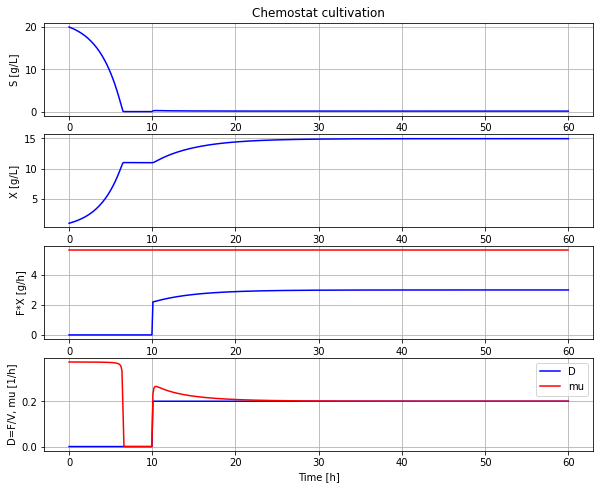

In [19]:
newplot()
par(Y=0.50, qSmax=0.75,  Ks=0.1)         # Culture parameters
init(V_0=1.0, VX_0=1.0, VS_0=20)         # Bioreactor startup
par(S_in=30, t0=0, F0=0, t1=10, F1=0.2)  # Substrate feeding
simu(60)

In [20]:
system_info()


System information
 -OS: Linux
 -Python: 3.7.13
 -PyFMI: 2.7.4
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL_TEST2.Chemostat
 -Generated: 2022-05-29T14:37:34
 -Description: Bioprocess Library version 2.0.9
 -Interaction: FMU-explore ver 0.9.0
